# Example of energy calibration

In [22]:
import pandas as pd
from nasagamma import spectrum as sp
from nasagamma import peaksearch as ps
from nasagamma import peakfit as pf
import matplotlib.pyplot as plt
import numpy as np

In [23]:
file = "data/10-23-2020-800-3.csv"
# the columns are not in a 'nice' format (blank spaces)
# so, rename them
dict0 = {" Energy (keV)" : "Energy", " Counts":"Counts"}

dfi = pd.read_csv(file, nrows=5)
df = pd.read_csv(file, header=6)
df = df.rename(columns=dict0)



This dataset does not have a "good" energy calibration, so ignore the energy column

In [24]:
df.head()

,Channel,Energy,Counts
0,1,0.5,0
1,2,1.0,0
2,3,1.5,0
3,4,2.0,0
4,5,2.5,0


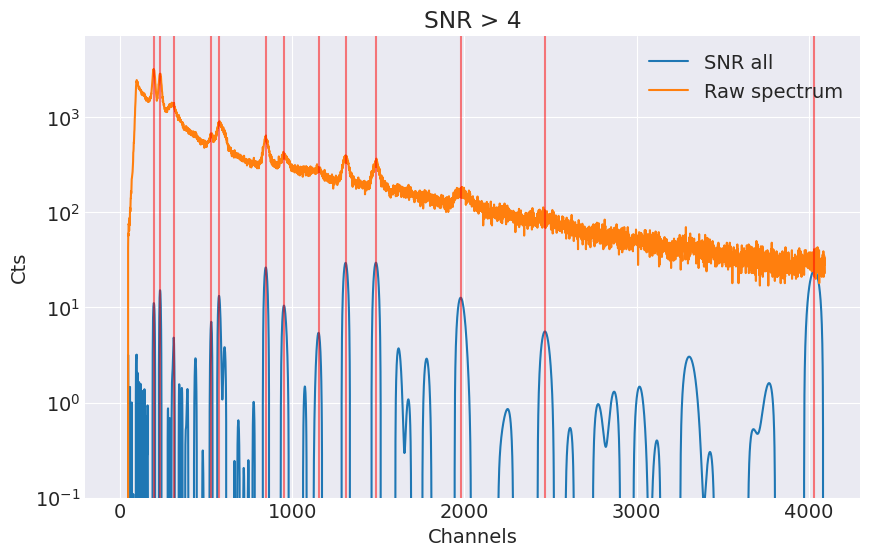

In [25]:
spect = sp.Spectrum(counts=df.Counts)
fwhm_at_0 = 1.0
ref_x = 1315
ref_fwhm = 42
search = ps.PeakSearch(spect, ref_x, ref_fwhm, fwhm_at_0, min_snr=4)
search.plot_peaks(yscale="log")

Initialize a PeakFit object for the range of Co-60 lines and plot the fit in "full" mode

Working with channel numbers
Found 2 peak(s) within range [1250, 1600]
Fit succeeded.


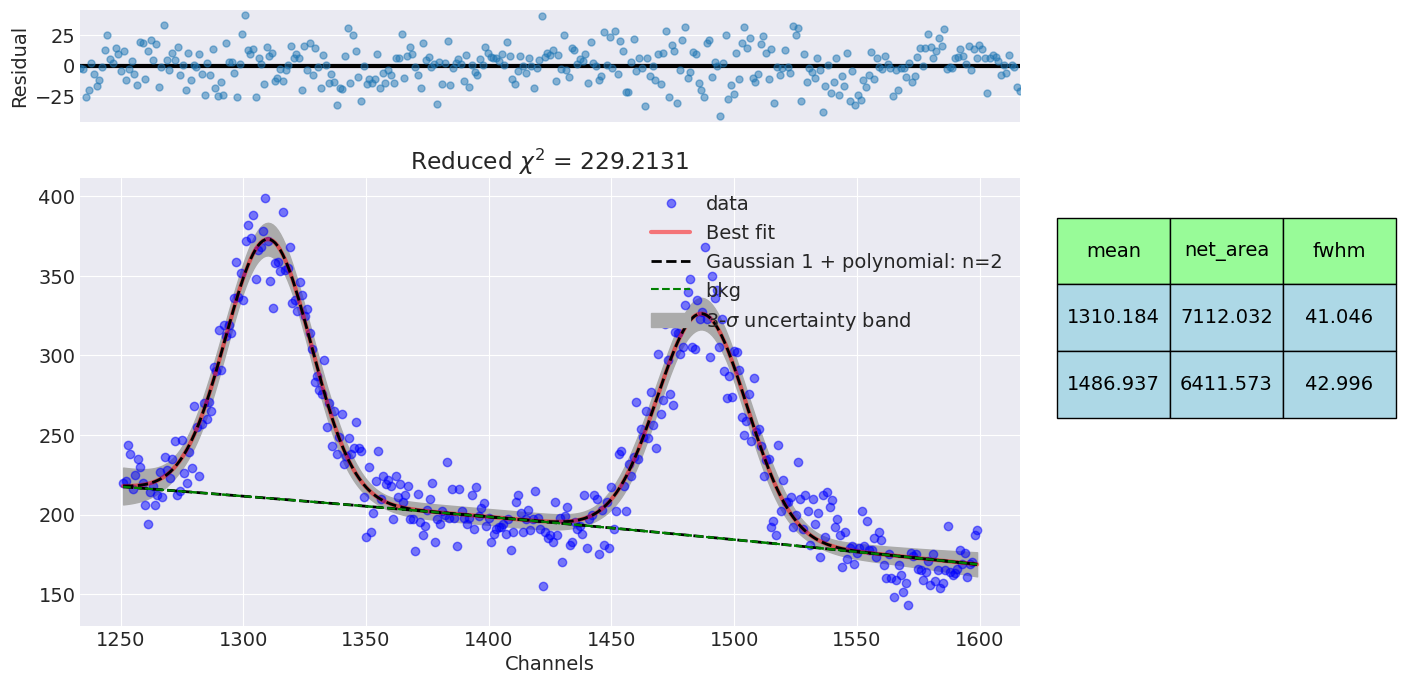

In [26]:
xrange = [1250, 1600]
bkg = "poly2"
fit = pf.PeakFit(search, xrange=xrange, bkg=bkg)
fit.plot(plot_type="full")


The fit errors can be found with the following command

In [27]:
print(fit.peak_err)

[{'mean_err1': 0.44476851918730453, 'area_err1': 84.33286393402878, 'fwhm_err1': 1.2551790709459267}, {'mean_err2': 0.5004258973381763, 'area_err2': 80.07229900292886, 'fwhm_err2': 1.3234827439299068}]


Perform the energy calibration by employing the ecalibratio method from PeakFit. In a later notebook we will see how getting the list of mean values is easier when using Gaussian components. 

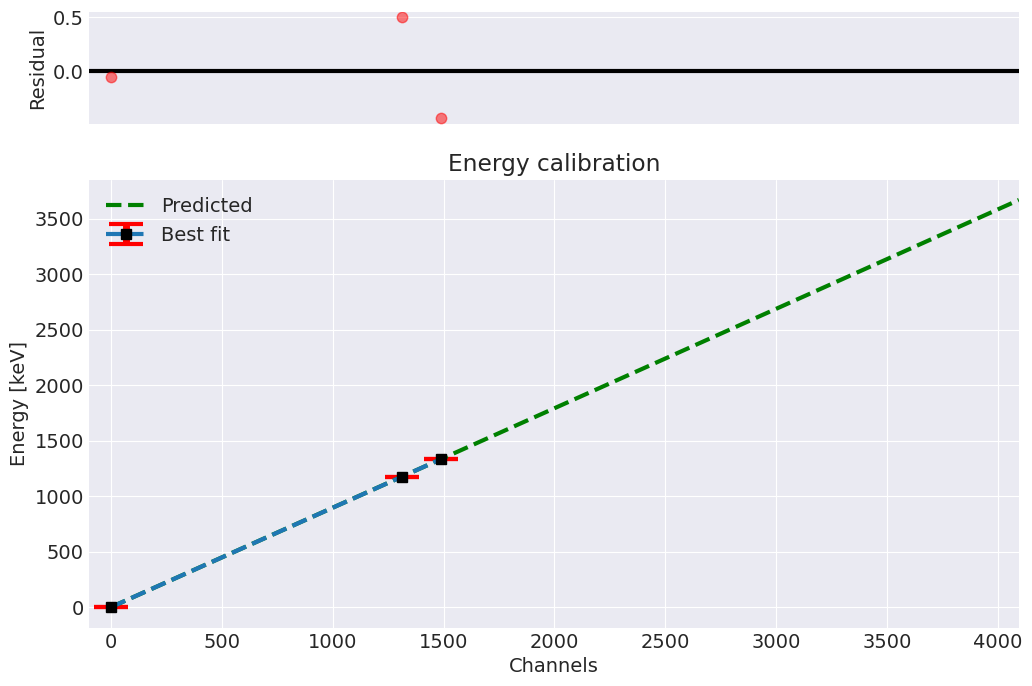

In [28]:
# energy calibration
ch = df.Channel.to_numpy(dtype=int) - 1
peak_info = fit.peak_info
mean_values = [peak_info[0]['mean1'], peak_info[1]['mean2']]
mean_values.insert(0,0) # add the origin
erg = [0, 1173.2, 1332.5] # in keV

pred_erg, efit = pf.ecalibration(mean_vals=mean_values, erg=erg, channels=ch, n=1,
                                plot=True)

In [29]:
pred_erg[0] = 0 # because negative entry

Plot calibrated spectrum

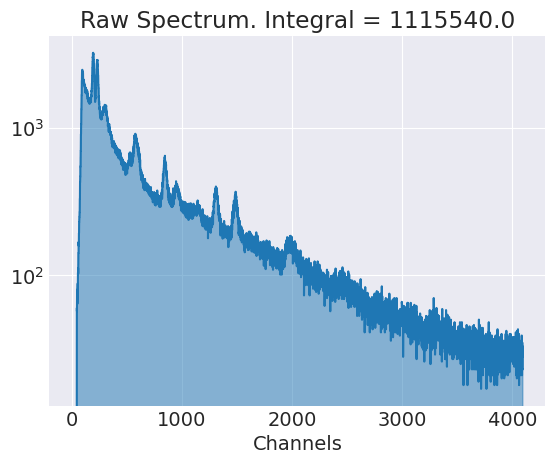

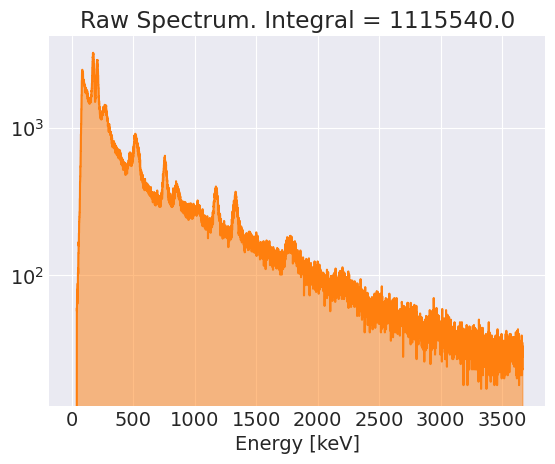

In [30]:
spect2 = sp.Spectrum(counts=df.Counts, energies=pred_erg, e_units="keV")
spect2.plot()